In [6]:
key = 'ecaea19b034b935f723cc8db2df2dd3fbeef0792'

In [3]:
!pip install pandas_datareader
import pandas_datareader as pdr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 145.8 kB/s eta 0:00:00 kB/s eta 0:00:01:01


In [22]:

from tiingo import TiingoClient
config = {
    'api_key': key,
    'session': True
}

# Initialize Tiingo client
client = TiingoClient(config)

# Define the stock symbol and the time period
symbol = 'AAPL'
start_date = '2018-01-01'
end_date = '2023-12-31'

# Fetch historical data
df = client.get_dataframe(symbol, startDate=start_date, endDate=end_date)

# Display the dataframe
print(df.head())

                            close    high     low    open    volume  \
date                                                                  
2018-01-02 00:00:00+00:00  172.26  172.30  169.26  170.16  25048048   
2018-01-03 00:00:00+00:00  172.23  174.55  171.96  172.53  28819653   
2018-01-04 00:00:00+00:00  173.03  173.47  172.08  172.54  22211345   
2018-01-05 00:00:00+00:00  175.00  175.37  173.05  173.44  23016177   
2018-01-08 00:00:00+00:00  174.35  175.61  173.93  174.35  20134092   

                            adjClose    adjHigh     adjLow    adjOpen  \
date                                                                    
2018-01-02 00:00:00+00:00  40.722078  40.731534  40.012881  40.225640   
2018-01-03 00:00:00+00:00  40.714986  41.263431  40.651158  40.785906   
2018-01-04 00:00:00+00:00  40.904105  41.008121  40.679526  40.788270   
2018-01-05 00:00:00+00:00  41.369811  41.457279  40.908833  41.001029   
2018-01-08 00:00:00+00:00  41.216152  41.514014  41.116864  41.2

In [23]:
df.to_csv('AAPL.csv')

In [24]:
import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('AAPL.csv')

In [26]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2018-01-02 00:00:00+00:00,172.26,172.30,169.26,170.16,25048048,40.722078,40.731534,40.012881,40.225640,100192192,0.0,1.0
1,2018-01-03 00:00:00+00:00,172.23,174.55,171.96,172.53,28819653,40.714986,41.263431,40.651158,40.785906,115278612,0.0,1.0
2,2018-01-04 00:00:00+00:00,173.03,173.47,172.08,172.54,22211345,40.904105,41.008121,40.679526,40.788270,88845380,0.0,1.0
3,2018-01-05 00:00:00+00:00,175.00,175.37,173.05,173.44,23016177,41.369811,41.457279,40.908833,41.001029,92064708,0.0,1.0
4,2018-01-08 00:00:00+00:00,174.35,175.61,173.93,174.35,20134092,41.216152,41.514014,41.116864,41.216152,80536368,0.0,1.0


In [27]:
df.shape

(1509, 13)

In [28]:
df1  =  df.reset_index()['close']

In [29]:
df1

0       172.26
1       172.23
2       173.03
3       175.00
4       174.35
         ...  
1504    193.60
1505    193.05
1506    193.15
1507    193.58
1508    192.53
Name: close, Length: 1509, dtype: float64

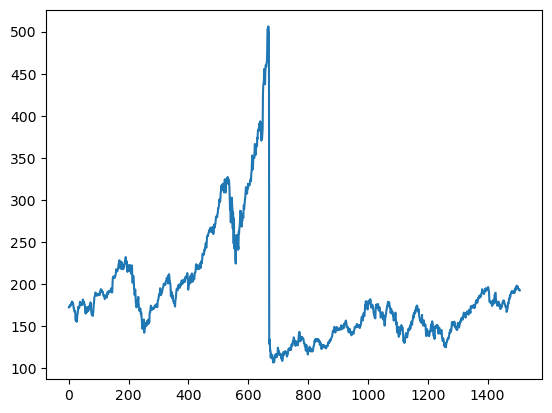

In [31]:
plt.plot(df1)

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scalar = MinMaxScaler(feature_range = (0,1))
df1 = scalar.fit_transform(np.array(df1).reshape(-1,1))

In [38]:
training_size         = int(len(df1)*0.65)
testing_size          = int(len(df1)) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [39]:
train_data.shape, test_data.shape

((980, 1), (529, 1))

In [42]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [43]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [44]:
print(x_train.shape), print(y_train.shape)

(879, 100)
(879,)


(None, None)

#### LSTM(input_shape, time_step, feature)

In [45]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test  = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [52]:
model = Sequential([
    LSTM(50, input_shape = (100,1), return_sequences = True),
    LSTM(50, return_sequences = True),
    LSTM(50),
    Dense(1)
])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [57]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
14/14 [==============================] - 12s 323ms/step - loss: 0.0332 - val_loss: 7.2039e-04
Epoch 2/20
14/14 [==============================] - 2s 166ms/step - loss: 0.0112 - val_loss: 4.1007e-04
Epoch 3/20
14/14 [==============================] - 2s 167ms/step - loss: 0.0085 - val_loss: 3.5627e-04
Epoch 4/20
14/14 [==============================] - 2s 166ms/step - loss: 0.0075 - val_loss: 4.4401e-04
Epoch 5/20
14/14 [==============================] - 2s 179ms/step - loss: 0.0067 - val_loss: 6.0240e-04
Epoch 6/20
14/14 [==============================] - 2s 172ms/step - loss: 0.0062 - val_loss: 3.0788e-04
Epoch 7/20
14/14 [==============================] - 3s 182ms/step - loss: 0.0054 - val_loss: 3.0077e-04
Epoch 8/20
14/14 [==============================] - 3s 184ms/step - loss: 0.0047 - val_loss: 4.0599e-04
Epoch 9/20
14/14 [==============================] - 3s 184ms/step - loss: 0.0042 - val_loss: 4.4103e-04
Epoch 10/20
14/14 [==============================] - 3s 189ms/s

In [58]:
train_pred  =  model.predict(x_train)
test_pred   =  model.predict(x_test)

14/14 [==============================] - 1s 43ms/step


In [59]:
train_pred = scalar.inverse_transform(train_pred)
test_pred  = scalar.inverse_transform(test_pred)

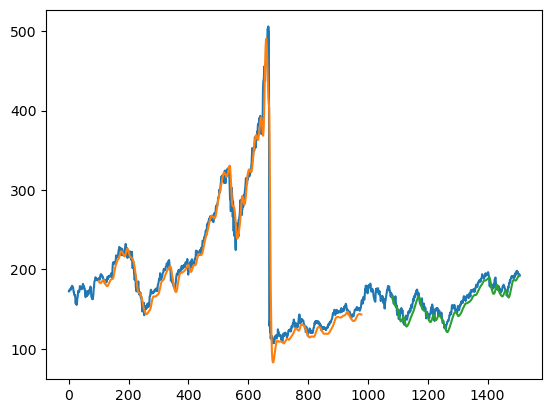

In [62]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df1)-1, :] = test_pred
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()